# **Estadística Multivariada.**
# **Titular: Dr. Julio César Galindo López**
## **Semestre 2024-I**
## **Equipo Conformado por:**
## Emmanuel Rivera López.
## Santiago Neiszer Bravo.
## Marcos Abel Cano Díaz.

# **1-. Bibliotecas y Módulos.**

In [ ]:
# A continuación, se declaran las bibliotecas y módulos a utilizar en este jpynb.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Problemas de Aplicación: Variable Aleatoria Normal $\pmb{n-}$ dimensional y Reducción Dimensional mediante PCA.**

2-. Realiza un PCA realizando la descomposición espectral de la matriz de varianzas-covarianza de $X$. Calcula la varianza total.

**Solución:** En primera instancia, se procederá a definir la matriz dentro del entorno Python para aplicar la definición del Análisis por Componentes Principales (PCA).

In [ ]:
# Definir la matriz X dada en el ejercicio 2 mediante el uso de la sentencia 'array' para introducir las entradas de la matriz;
X = np.array([-1, 0, 1, 0, -1, 1]).reshape((2,3))
X

array([[-1,  0,  1],
       [ 0, -1,  1]])

Para facilitar los cálculos correspondients al PCA (ya que en este caso se tiene una matriz arbitraria de datos), se procederá mediante la función que se definió en clase que realiza el cálculo completo. En este caso por definición, ya que la dimensión de la matriz es $3\times 3$, se realizará un análisis para 2 componentes principales (recuerde el hecho de que $<<n$) dónde $n$ denota el grado del objeto (constructo) o conjunto de datos a analizar.

In [ ]:
def PCA(X , n_componentes):

    X_media = X - np.mean(X , axis = 0)
    # Calcular la matriz de Varianzas-Covarianzas.
    cov_mat = np.cov(X_media , rowvar = False)
    # Para demostrar que la matriz generada, se procederá a calcular eigenvalores y eigenvectores, para esto, se empleará la función 'eigh' de la sub-biblioteca
    # 'linalgebra' para realizar el cálculo de ambos parámetros
    eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_index]
    sorted_eigenvec = eigen_vec[:,sorted_index]

    eigenvector_ = sorted_eigenvec[:,0:n_componentes]

    X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()
    # Imprimir en consola tras la ejecución de la función
    return X_red

In [ ]:
X_red= PCA(X, 2)
print('El PCA para la matriz está dado cómo sigue:')
X_red

El PCA para la matriz está dado cómo sigue:


array([[ 0.70710678,  0.        ],
       [-0.70710678,  0.        ]])

In [ ]:
# Imprimir en consola dentro de un DataFrame, las componentes principales correspondientes al análisis de las matriz definida al principio.
PCAEx2_df = pd.DataFrame(X_red, columns = ['PC1_MatrixEx2','PC2_MatrixEx2'])
PCAEx2_df

,PC1_MatrixEx2,PC2_MatrixEx2
0,0.707107,0.0
1,-0.707107,0.0


Por lo tanto, las primeras dos componentes principales están definidas cómo sigue:
$$\begin{aligned}
\xi_{1} &= 0.70710678X_{11}+0X_{12}=0.70710678X_{11} \\
\xi_{2} &= -0.70710678X_{12}+0X_{22}=-0.70710678X_{12}
\end{aligned}$$

De aquí para calcular la varianza total de las componentes principales, se procederá mediante el código visto en clase; dado esto, se tiene lo que sigue:

In [ ]:
# Información total

eigen_val_total = sum(eigen_val)
varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]
varianza_explicada = np.round(varianza_explicada, 2)
varianza_explicada_acumulada = np.cumsum(varianza_explicada)
print("Varianza explicada: {}".format(varianza_explicada))
print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

Varianza explicada: [41.74 25.81 15.71 12.21  4.54]
Varianza explicada acumulada: [ 41.74  67.55  83.26  95.47 100.01]


3-. Considerando los datos de *wine.data.* Realice un PCA usando el código visto en clase **(sin sklearn)**. Recuerde preprocesar sus datos. Comenta tus resultados.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
wine = fetch_ucirepo(id=109)
# data (as pandas dataframes)
X_wines = wine.data.features
y_wines = wine.data.targets
print(X_wines)

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

In [ ]:
np.ndim(X_wines)

2

In [ ]:
np.array(np.mean(X_wines, axis = 0)) # Calcula la media por cada una de las columnas de la composición de los vinos.

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [ ]:
np.mean(y_wines, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    3.0
174    3.0
175    3.0
176    3.0
177    3.0
Length: 178, dtype: float64

In [ ]:
# Centramos a los datos
Ywines_media = y_wines - np.mean(y_wines, axis = 0)
Ywines_media

,class
0,-0.938202
1,-0.938202
2,-0.938202
3,-0.938202
4,-0.938202
...,...
173,1.061798
174,1.061798
175,1.061798
176,1.061798


In [ ]:
# Crear la matriz de varianza-covarianzas mediante la sentencia 'cov', a partir de la matriz ajustada Y_media
VarCov_wines = np.cov(Ywines_media, rowvar = False)
# Imprimir la matriz de varianzas-covarianzas.
print(VarCov_wines)

0.6006792357011365


## **Comprobación Mediante el uso de la Biblioteca scikit-learn**
Realizando el mismo procedimiento para 3 componentes principales, se tiene que el PCA realizado a través sklearn está dado cómo sigue:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_stdwines = StandardScaler().fit_transform(X_wines)
print(X_stdwines)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


4-. **(PCA Números Pseudoaleatorios Generados por una v.a. normal multidimendional)** Genere una muestra aleatoria de tamano 100 apartir de una distribución gaussiana 3 dimensional en donde una de las variables tiene más alta varianza que las otras. Realiza unPCA.En cada caso,encuentre los eigen valores y eigenvectores ydibuja la gráfica scree

**Solución:** Por definición, la matriz de varianzas-covarianzas de una v.a. normal $n-$dimensional es positiva definida; i.e., se tiene que las entradas de la matriz $a_{ij}$ son positivas para satisfacer la definición. Dado esto, se construirá una distribución normal 3-dimensional bajo un esquema clásico de Teoría de la Probabilidad en Variedades:

Considere que $X_{1},X_{2},X_{3}$ cómo v.a. absolutamente continuas i.i.d. tales que siguen una distribución normal estándar, es decir, $\mathcal{N}\sim (0,1)$, además defínase un nuevo conjunto de v.a. dadas por $U=X+3Y, V=3X+7Z \textrm{ y } Z=8Y+6Z$. De aquí, de procederá a construir la v.a. 3-dimensional considerando a las variables $U,V,Z$. Dado esto, se procederá a construir el vector de medias y la matriz de varianzas-covarianzas de la v.a. Aplicando la definición del valor esperado y la varianza (así como recordando sus propiedades, respectivamente), se tiene lo que sigue:

$\begin{aligned}
\mathbb{E}[X+3Y] &=\mathbb{E}[X]+\mathbb{E}[3Y]=0 \\
\textrm{Var}[X+3Y] &=\textrm{Var}[X]+\textrm{Var}[3Y]=\textrm{Var}[X]+9\textrm{Var}[Y] \\
&=1+9=10 \\
\mathbb{E}[3X+7Z] &=\mathbb{E}[3X]+\mathbb{E}[7Z]=3\mathbb{E}[X]+7\mathbb{E}[Z]=0 \\
\textrm{Var}[3X+7Z] &=\textrm{Var}[3X]+\textrm{Var}[7Z]=9\textrm{Var}[X]+49\textrm{Var}[Y] \\
&=9(1)+49(1)=58
\end{aligned}$

$\begin{aligned}
\mathbb{E}[8Y+6Z] &=\mathbb{E}[8Y]+\mathbb{E}[6Z]=8\mathbb{E}[Y]+6\mathbb{E}[Z]=0 \\
\textrm{Var}[8Y+6Z] &=\textrm{Var}[8Y]+\textrm{Var}[6Z]=64\textrm{Var}[Y]+36\textrm{Var}[Y] \\
&=64(1)+36(1)=100
\end{aligned}$

De aquí, aplicando la definición del operador de covarianza y sus propiedades, se tiene que las covarianzas están dadas cómo sigue:

$\begin{aligned}
\textrm{Cov}[U,V] &=\textrm{Cov}[X+3Y,3X+7Z]=\textrm{Cov}[X,3X]+\textrm{Cov}[X,7Z]+\textrm{Cov}[3Y,3X]+\textrm{Cov}[3Y,7Z] \\
&=\textrm{Cov}[X,3X]=3\textrm{Cov}[X,X]=3\textrm{Var}[X]=3 \\
\textrm{Cov}[U,Z] &=\textrm{Cov}[X+3Y,8Y+6Z]=\textrm{Cov}[X,8Y]+\textrm{Cov}[X,6Z]+\textrm{Cov}[3Y,8Y]+\textrm{Cov}[3Y,6Z] \\
&=\textrm{Cov}[3Y,8Y]=(3)(8)\textrm{Cov}[Y,Y]=24\textrm{Var}[Y]=24 \\
\textrm{Cov}[V,Z] &=\textrm{Cov}[3X+7Z,8Y+6Z]=\textrm{Cov}[3X,8Y]+\textrm{Cov}[3X,6Z]+\textrm{Cov}[7Z,8Y]+\textrm{Cov}[7Z,6Z] \\
&=\textrm{Cov}[7Z,6Z]=(7)(6)\textrm{Cov}[Z,Z]=42\textrm{Var}[Z]=42 \\
\end{aligned}$

Y por hipótesis, ya que $X_{1},X_{2} \textrm{ y } X_{3}$ son independientes, entonces las combinaciones lineales de $(U,V,Z)$ son v.a normales independientes también. Así, se tiene que la distribución conjunta tiene:
$$f_{U,V,Z}(u,v,z)\sim \mathbb{N}_{3}\left(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 10 & 3 & 24 \\ 3 & 58 & 42 \\ 24 & 42 & 100 \end{bmatrix}\right)$$

In [ ]:
# Si usted quiere verificar los resultados de PCA con una semilla preestablecida para generar los números pseudoaleatorios a partir de la definición de la v.a.
# normal 3-dimensional y comparar sus resultados con el análisis hecho mediante la biblioteca 'sci.kit-learn', quite el comentario de la siguiente línea de código.
# np.random.seed(0)
MN_3CovVar = np.array([[10, 3, 24], [3, 58, 42], [24, 42, 100]])
norm_sample = np.random.multivariate_normal([0, 0, 0], MN_3CovVar, size=100)
norm_sample

array([[  2.09138996,  -4.07000532,  -4.07930994],
       [ 10.01958223,   9.52095839,  30.71543274],
       [ -5.6324472 ,  -5.43730224, -16.86997186],
       [  2.88521404,  -7.67365545,  13.93221349],
       [  7.50455124,  -0.64361286,  16.1553674 ],
       [ -3.37095026,  12.45355865,  -3.67174598],
       [  0.39146224,   5.07886146,  16.31049104],
       [  4.9508139 ,   0.49717762,   9.40269438],
       [ -0.79955075,   1.94790954,  -7.17671157],
       [  2.89294179,   2.71927129,  13.80487752],
       [  3.37150304,   2.28592285,  10.76275433],
       [ -5.05972964,   2.41219025,  -0.412072  ],
       [ -3.75123433,  -8.92753589, -16.04821996],
       [ -5.48238817, -10.25433892, -21.97511621],
       [ -3.18220312,  -7.75632   , -17.14257694],
       [ -3.39401821,  -4.62413298, -12.96114351],
       [ -0.18052445,   2.47982753,   0.75253608],
       [ -2.40279739,  -5.80451701, -11.90114492],
       [ -5.43323479,  -1.93264511, -14.2733467 ],
       [  1.03315206,  -0.56251

In [ ]:
np.mean(norm_sample, axis = 0) # Calcula la media por columnas y mostrarlas en un arreglo

array([-0.08904687, -0.19599709,  0.48237075])

In [ ]:
np.mean(norm_sample, axis = 1) # Calcula la media por renglones y las muestra en un arreglo

array([ -2.01930843,  16.75199112,  -9.31324043,   3.04792403,
         7.67210193,   1.8036208 ,   7.26027158,   4.95022863,
        -2.00945093,   6.47236353,   5.4733934 ,  -1.01987046,
        -9.5756634 , -12.57061443,  -9.36036668,  -6.99309823,
         1.01727972,  -6.70281977,  -7.21307554,   0.75013178,
         8.45173875,  -6.76845417,  -3.40854825,  -3.988324  ,
         2.35429282,  -6.83188447,   3.82705185,  -3.76966728,
         1.19899015,  -7.43537418,   4.5437328 ,  -2.49810436,
         3.64297059,  13.25850701,  -5.5792881 ,   1.78643813,
       -10.97913364,   4.39253541,   4.03696704,  -1.62571607,
         0.92678447,   4.91011159,  11.93471594,  -9.54392292,
         2.58038913,  -8.56007084,  -0.68243436,  -7.26557203,
         4.73791106,   0.18286853,   2.46533666,   0.65755927,
        -2.00034142,  -9.07879571,   0.6004411 ,  14.63293786,
        -4.80626547,   7.52720182,   0.26471368,   4.70448907,
         5.29248633,   0.96933131,   7.51305324,   8.57

In [ ]:
# Centramos a los datos
MNcentered_sample = norm_sample - np.mean(norm_sample, axis = 0)
print(MNcentered_sample)

[[ 2.18043683e+00 -3.87400823e+00 -4.56168068e+00]
 [ 1.01086291e+01  9.71695548e+00  3.02330620e+01]
 [-5.54340033e+00 -5.24130515e+00 -1.73523426e+01]
 [ 2.97426091e+00 -7.47765836e+00  1.34498427e+01]
 [ 7.59359811e+00 -4.47615767e-01  1.56729967e+01]
 [-3.28190340e+00  1.26495557e+01 -4.15411672e+00]
 [ 4.80509111e-01  5.27485855e+00  1.58281203e+01]
 [ 5.03986077e+00  6.93174711e-01  8.92032363e+00]
 [-7.10503886e-01  2.14390664e+00 -7.65908232e+00]
 [ 2.98198866e+00  2.91526838e+00  1.33225068e+01]
 [ 3.46054990e+00  2.48191994e+00  1.02803836e+01]
 [-4.97068277e+00  2.60818734e+00 -8.94442747e-01]
 [-3.66218747e+00 -8.73153880e+00 -1.65305907e+01]
 [-5.39334130e+00 -1.00583418e+01 -2.24574870e+01]
 [-3.09315625e+00 -7.56032291e+00 -1.76249477e+01]
 [-3.30497134e+00 -4.42813588e+00 -1.34435143e+01]
 [-9.14775786e-02  2.67582462e+00  2.70165330e-01]
 [-2.31375052e+00 -5.60851992e+00 -1.23835157e+01]
 [-5.34418792e+00 -1.73664802e+00 -1.47557174e+01]
 [ 1.12219893e+00 -3.66519073e-

In [ ]:
# Crear la martriz de varianza-covarianzas mediante la sentencia 'cov', a partir de la matriz ajustada de los datos simulados de la v.a. normal 3-dimensional
# 'MNcentered_sample'.
S_1 = np.cov(MNcentered_sample, rowvar = False)
# Imprimir la matriz de varianzas-covarianzas.
print(S_1)

[[ 11.13196359   2.80713945  28.57483277]
 [  2.80713945  53.93975234  39.95758328]
 [ 28.57483277  39.95758328 119.95616508]]


In [ ]:
# Para demostrar que la matriz generada es positiva definida, se procederá a calcular eigenvalores y eigenvectores, para esto, se procederá mediante la
# sub-biblioteca 'linalgebra' para realizar el cálulo de ambos parámetros
eigen_val_MNsim, eigen_vec_MNsim = np.linalg.eigh(S_1)
print('Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional es:')
print(eigen_val_MNsim)
print('Los eigenvenctores asociados al Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional son:')
print(eigen_vec_MNsim)


Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional es:
[  2.86998081  37.85334035 144.30455985]
Los eigenvenctores asociados al Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional son:
[[ 0.94118502  0.27217301 -0.20023137]
 [ 0.17460392 -0.89909914 -0.40141526]
 [-0.28928225  0.34284485 -0.89374112]]


In [ ]:
# Reescribir los eigenvalores de manera decreciente y que satisfaga el Teorema, por lo que se reescribirán los valores de manera decreciente para que se
# encuentren dentro de la cámara de Weyl.
eigen_val_MNsim[::-1]

array([144.30455985,  37.85334035,   2.86998081])

In [ ]:
eigen_vec_MNsim = eigen_vec_MNsim[:,np.argsort(eigen_val_MNsim)[::-1]]

eigen_vec_MNsim

array([[-0.20023137,  0.27217301,  0.94118502],
       [-0.40141526, -0.89909914,  0.17460392],
       [-0.89374112,  0.34284485, -0.28928225]])

De aquí, para poder realizar el análisis por Componentes Principales, se procederá a determinar el número de componentes a analizar; por hipótesis, se simularon números pseudoaleatorios a partir de una v.a. 3-dimensional, por lo que $n=2$ por definición. Dado esto, calculando los eigenvalores y eigenvectores, se tiene lo que sigue:

In [ ]:
# Definir el número de componentes sorbre el cuál se realizará el PCA
n_components = 2
# Se elegirán ciertos elementos de las entradas pertenecientes a la matriz de eigenvectores generada previamente. Note que la matriz previa ya está ordenada de
# acuerdo a los eigenvectores ordenados dentro de la cámara de Weyl
eigenvectorMNsim_2 = eigen_vec_MNsim[:,0:n_components]
eigenvectorMNsim_2

array([[-0.20023137,  0.27217301],
       [-0.40141526, -0.89909914],
       [-0.89374112,  0.34284485]])

In [ ]:
# Descomposición espectral
MN_red = np.dot(eigenvectorMNsim_2.transpose(),MNcentered_sample.transpose()).transpose()
# Imprimir la descomposición espectral de los datos de la v.a. Gaussiana
MN_red

array([[ 5.19545576e+00,  2.51262479e+00],
       [-3.29451295e+01,  4.38003925e+00],
       [ 1.87224046e+01, -2.74547228e+00],
       [-9.61457168e+00,  1.21438790e+01],
       [-1.53483983e+01,  7.84262957e+00],
       [-7.07879744e-01, -1.36906677e+01],
       [-1.63598637e+01,  8.14750332e-01],
       [-9.25984917e+00,  3.80676829e+00],
       [ 6.12690513e+00, -4.74684151e+00],
       [-1.36741930e+01,  2.75805435e+00],
       [-1.08771927e+01,  2.23495275e+00],
       [ 7.47720696e-01, -4.00455977e+00],
       [ 1.90123264e+01,  1.18634257e+00],
       [ 2.51886675e+01, -1.23909162e-01],
       [ 1.94063164e+01, -8.70163453e-02],
       [ 1.44543017e+01, -1.52723044e+00],
       [-1.29725802e+00, -2.33810455e+00],
       [ 1.37822881e+01,  1.67250440e-01],
       [ 1.49549825e+01, -4.95204668e+00],
       [-1.23710270e+00,  1.07977227e+00],
       [-1.46119050e+01, -1.19637823e+01],
       [ 1.39091329e+01, -3.96167761e+00],
       [ 6.77424932e+00,  5.43441628e+00],
       [ 7.

In [ ]:
# Imprimir en consola dentro de un DataFrame, las componentes principales correspondientes al análisis de la muestra generada a partir de la v.a. 3-dimensional
# construida al inicio del ejercicio
PCAMNSample_df = pd.DataFrame(MN_red, columns = ['PC1_MNSimulation','PC2_MNSimulation'])
# Mostrar las componentes principales por cada una de la i-ésima componente dónde i=0,...,99
PCAMNSample_df

,PC1_MNSimulation,PC2_MNSimulation
0,5.195456,2.512625
1,-32.945130,4.380039
2,18.722405,-2.745472
3,-9.614572,12.143879
4,-15.348398,7.842630
...,...,...
95,8.926965,2.500874
96,6.296874,-8.084024
97,-7.605509,-8.979222
98,7.353031,-3.737305


Finalmente, se procederá a determinar la gráfica de pedregal *(scree plot)* corrspondiente al análisis correspondiente a la v.a. Normal 3-Dimensional definida previamente. Aplicando la definición del gráfico scree y mediante el uso de las bibliotecas, se tiene lo que sigue:

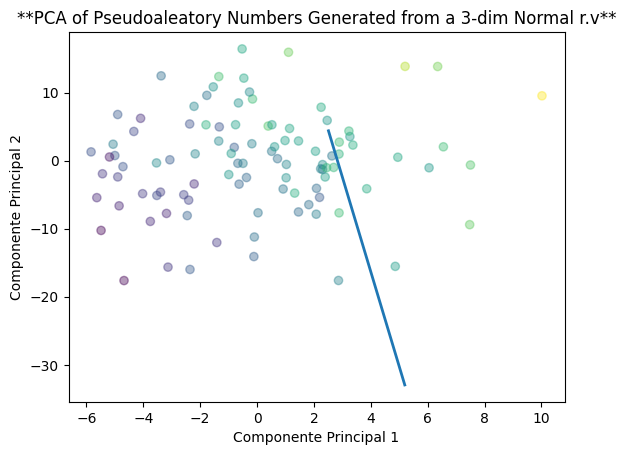

In [ ]:
# Definir una función que permita general el gráfico.
def plot_MNdata(norm_sample,MN_red):
  plt.scatter(norm_sample[:,0],norm_sample[:,1],c=norm_sample[:,2], alpha=0.4)
  plt.plot(MN_red[0,:], MN_red[1,:], lw=2)
  plt.xlabel("Componente Principal 1")
  plt.ylabel("Componente Principal 2")
  plt.title('**PCA of Pseudoaleatory Numbers Generated from a 3-dim Normal r.v**')
  plt.show()

# Imprimir en consola el gráfico de la distribución correspondiente a los datos simulados a partir de la v.a. normal 3-dimensional construida bajo las hipótesis
# descritas previamente.
plot_MNdata(norm_sample,MN_red)

Para comprobar los resultados obtenidos tras la simulación realizada con el programa 'from-scratch', se procederá mediante el uso de la biblioteca *sci-kit.learn.*

**Observación:** Es importante recalcar el hecho de que se podrá realizar la comprobación respecto al cálculo hecho 'from scratch' ***si y solamente sí*** usted establece una semilla en ambos códigos; en caso contrario, los resultados obtenidos serán variables y no podrá comprobar la viabilidad de ambos métodos.

In [ ]:
from sklearn.decomposition import PCA
# Definir el vector de medias de la v.a. 3-dimensional construida previamente.
mu_vec = np.array([0, 0, 0])
# Definir la matriz de varianzas-covarianzas correspondientes a la construcción.
varcov_matx =np.array([[10, 3, 24], [3, 58, 42], [24, 42, 100]])
# Establecer la semilla para la generación de los números pseudoaleatorios:
np.random.seed(0)
MN_sample = np.random.multivariate_normal(mu_vec, varcov_matx, 100)

pca = PCA(n_components=2)
pca.fit(MN_sample)
# Obtener las componentes principales de los valores de la v.a. normal así cómo sus varianzas explicadas.
components_MN = pca.components_
explained_variance = pca.explained_variance_ratio_
print("Las componentes principales de muestra de la simulación es:")
print(components_MN)
print("Las varianzas explicadas están dadas por:")
print(explained_variance)

Las componentes principales de muestra de la simulación es:
[[ 0.21112474  0.4615671   0.86161602]
 [-0.30477023  0.86862678 -0.39064386]]
Las varianzas explicadas están dadas por:
[0.79067915 0.19504931]


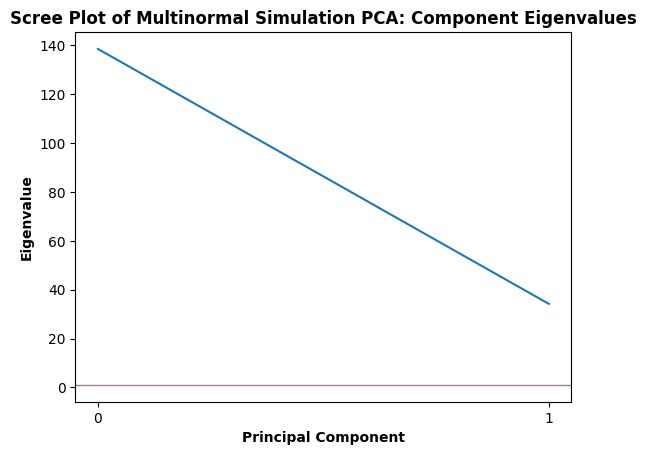

In [ ]:
# Definir una función que permita determinar el gráfico de pedregal correspondiente a la muestra generada a partir de la semilla aleatoria:
def screeplot_MNSimulation ():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component',fontweight='bold')
    plt.ylabel('Eigenvalue',fontweight='bold')
    plt.axhline(y=1, linewidth=1, color='#44031A', alpha=0.5)
    plt.title('Scree Plot of Multinormal Simulation PCA: Component Eigenvalues',fontweight='bold')
    show()

screeplot_MNSimulation()


5-.  Se requiere efectuar un PCA de la matriz:
$$X=\begin{pmatrix}
1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 0 \\ 1 & 1 & 1 & 1
\end{pmatrix}$$

(1) Verifique que obtener los eigenvalores de la matriz
$$A=\begin{bmatrix}
3 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 3
\end{bmatrix}$$

In [ ]:
# Definir la matriz triangular inferior del ejercicio 5 cómo un arreglo, para posteriormente redimensionarlo mediante la sentencia 'reshape' cómo una matriz de
# tamaño 4x4.
X_ex5 = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]).reshape((4,4))
X_ex5

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
# Uso de la sentencia ndim, para indicar el tamaño del objeto en Python
np.ndim(X_ex5)

2

In [ ]:
np.mean(X_ex5, axis = 0) # Calcula la media por columnas y las muestra en un arreglo.

array([1.  , 0.75, 0.5 , 0.25])

In [ ]:
np.mean(X_ex5, axis = 1) # Calcula la media por renglones y las muestra en la matriz dada.

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# Centramos a los datos
X_ex5_media = X_ex5 - np.mean(X_ex5, axis = 0)
print(X_ex5_media)

[[ 0.   -0.75 -0.5  -0.25]
 [ 0.    0.25 -0.5  -0.25]
 [ 0.    0.25  0.5  -0.25]
 [ 0.    0.25  0.5   0.75]]


In [ ]:
# Crear la matriz de varianza-covarianzas mediante la sentencia 'cov', a partir de la matriz triangular ajustada.
S_Xex5 = np.cov(X_ex5_media, rowvar = False)
# Imprimir la matriz de varianzas-covarianzas.
print(S_Xex5)

[[0.         0.         0.         0.        ]
 [0.         0.25       0.16666667 0.08333333]
 [0.         0.16666667 0.33333333 0.16666667]
 [0.         0.08333333 0.16666667 0.25      ]]


In [ ]:
# Para demostrar que la matriz generada, se procederá a calcular eigenvalores y eigenvectores, para esto, se procederá mediante la sub-biblioteca 'linalgebra'
# para realizar el cálulo de ambos parámetros
eigen_valEx5, eigen_vecEx5 = np.linalg.eigh(S_Xex5)

In [ ]:
eigen_valEx5

array([0.        , 0.09763107, 0.16666667, 0.56903559])

In [ ]:
# Reescribir los eigenvalores de manera decreciente y que satisfaga el Teorema, por lo que se reescribirán los valores de manera decreciente para que se
# encuentren dentro de la cámara de Weyl.
eigen_valEx5[::-1]

array([0.56903559, 0.16666667, 0.09763107, 0.        ])

In [ ]:
eigen_vecEx5 = eigen_vecEx5[:,np.argsort(eigen_valEx5)[::-1]]
# Imprimir en consola los eigenvectores correspondientes a la matriz inicial.
eigen_vecEx5

array([[ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-5.00000000e-01, -7.07106781e-01,  5.00000000e-01,
         0.00000000e+00],
       [-7.07106781e-01,  2.77555756e-16, -7.07106781e-01,
         0.00000000e+00],
       [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01,
         0.00000000e+00]])

In [ ]:
n_components = 2
# Se elegirán ciertos elementos de las entradas pertenecientes a la matriz de eigenvectores generada previamente. Note que la matriz previa ya está ordenada de
# acuerdo a los eigenvectores ordenados dentro de la cámara de Weyl
eigenvectorEx5_2 = eigen_vecEx5[:,0:n_components]
eigenvectorEx5_2

array([[ 0.00000000e+00, -0.00000000e+00],
       [-5.00000000e-01, -7.07106781e-01],
       [-7.07106781e-01,  2.77555756e-16],
       [-5.00000000e-01,  7.07106781e-01]])

In [ ]:
# Descomposición espectral
Ex5_red = np.dot(eigenvectorEx5_2.transpose(),X_ex5_media.transpose()).transpose()

Ex5_red

array([[ 0.85355339,  0.35355339],
       [ 0.35355339, -0.35355339],
       [-0.35355339, -0.35355339],
       [-0.85355339,  0.35355339]])

Ahora, se procederá a definir la matriz $A$

(2) Determina al segundo eje principal del PCA de $X.$

In [ ]:
A=np.array([3,2,1,2,4,2,1,2,3]).reshape((3,3))
# Imprimir en consola la matriz A ajustada a su dimensión.
A

array([[3, 2, 1],
       [2, 4, 2],
       [1, 2, 3]])

In [ ]:
A_mean = A - np.mean(A , axis = 0) # Calcular la media por columnas y mostrarla en consola en un arreglo.
A_mean

array([[ 1.        , -0.66666667, -1.        ],
       [ 0.        ,  1.33333333,  0.        ],
       [-1.        , -0.66666667,  1.        ]])

In [ ]:
VarCovMat_A = np.cov(A_mean, rowvar = False)
# Imprimir en consola la matriz de Varianzas-Covarianzas de la matriz dada
print(VarCovMat_A)

[[ 1.          0.         -1.        ]
 [ 0.          1.33333333  0.        ]
 [-1.          0.          1.        ]]


In [ ]:
# Para demostrar que la matriz generada, se procederá a calcular eigenvalores y eigenvectores, para esto, se procederá mediante la sub-biblioteca 'linalgebra'
# para realizar el cálulo de ambos parámetros
eigen_valA, eigen_vecA = np.linalg.eigh(VarCovMat_A)
print('Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de Matriz A son:')
print(eigen_val_MNsim)
print('Los eigenvenctores asociados al Varianzas-Covarianzas de la Matriz A son:')
print(eigen_vec_MNsim)

Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de Matriz A son:
[  2.86998081  37.85334035 144.30455985]
Los eigenvenctores asociados al Varianzas-Covarianzas de la Matriz A son:
[[-0.20023137  0.27217301  0.94118502]
 [-0.40141526 -0.89909914  0.17460392]
 [-0.89374112  0.34284485 -0.28928225]]


De aquí, note que hay discrepancias en cada una de las entradas, tanto de eigenvectores cómo de eigenvalores de la matriz $X$ respecto a la $A$; por lo que el cálculo no parece equivalente a simple vista. Solamente que note que al hacer la suma de las diagonales y la traza de la matriz $X$, se obtienen los valores de la matriz $A$.

(3) Provee las coordenadas sobre los segundos ejes por renglones y columnas del PCA de $X$

In [ ]:
projection_MatX = np.dot(X_ex5, eigenvectorEx5_2[:, :2])
projection_MatX

array([[ 0.00000000e+00,  0.00000000e+00],
       [-5.00000000e-01, -7.07106781e-01],
       [-1.20710678e+00, -7.07106781e-01],
       [-1.70710678e+00,  2.22044605e-16]])

6-. En 28 años, se han observado 4 estados metereológicos:
<li> $\xi_{1}:$ precipitación en julio
<li> $\xi_{2}:$ temperatura media en julio (en grados Celcius $C$)
<li> $\xi_{3}:$ velocidad media del viento en julio $(en $km/h$)$
<li> $\xi_{4}:$ precipitación en septiembre (en mm).

A partir de tales datos,se tiene la matriz de varianzas-covarianzas:

$$\begin{bmatrix}
140.017 & 107.881 & 139.068 & 109.065 \\
0 & 106.038 & 110.0439 & 82.627 \\
0 & 0 & 168.762 & 125.136 \\
0 & 0 & 0 & 108.960
\end{bmatrix}$$
y las correlaciones empíricas están dadas por:
$$\begin{bmatrix}
0.969 & -0.102 & 0.194 & 0.116 \\
0.907 & -0.392 & -0.106 & -0.111 \\
0.971 & 0.156 & -0.157 & 0.092 \\
0.943 & 0.252 & 0.092 & -0.196
\end{bmatrix}$$
(1) Calcula las varianzas empirícas de las componentes principales.

**Solución:** Por definición, las varianzas empíricas de la $i-$ésima componente, están dadas cómo la suma de las varianzas; ahora, note que se tiene la matriz de varianzas-covarianzas, por lo que se procederá a calcular los pasos restantes del PCA bajo las hipótesis usuales.

In [ ]:
# Definir la matriz de Varianzas-Covarianzas del estudio realizado durante 28 años:
MetVarCov_Mat = np.array([140.017, 107.881, 139.068, 109.065, 0, 106.038, 110.0439, 82.627, 0, 0, 168.762, 125.136, 0, 0, 0, 108.960]).reshape((4,4))
MetPearCorr_Mat = np.array([0.969, -0.102, 0.194, 0.116, 0.907, -0.392, -0.106, -0.111, 0.971, 0.156, -0.157, 0.092, 0.943, 0.252, 0.092, -0.196])
# De aquí, para determinar las varianzas empíricas, se procederá a tomar solamente los valores contenidos en la diagonal de la matriz de Varianzas-Covarianzas,
# por lo que se empleará la función 'np.diag'
empirical_var = np.diag(MetVarCov_Mat)
print("Las varianzas empíricas correspondientes a las componentes principales están dadas por:")
print(empirical_var)

Las varianzas empíricas correspondientes a las componentes principales están dadas por:
[140.017 106.038 168.762 108.96 ]


(b) Calcular la parte de la varianza $\xi_{1}$ explicada por las dos últimas componentes principales, y la parte de la varianza $\xi_{2}$ explicada por las dos primeras componentes principales.

**Solución:** Empleando el código visto en clase, se tiene lo que sigue:

In [ ]:
# Para demostrar que la matriz generada es positiva definida, se procederá a calcular eigenvalores y eigenvectores, para esto, se procederá mediante la
# sub-biblioteca 'linalgebra' para realizar el cálulo de ambos parámetros
eigen_val_Met, eigen_vec_Met = np.linalg.eigh(MetVarCov_Mat)
print('Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional es:')
print(eigen_val_Met)
print('Los eigenvenctores asociados al Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional son:')
print(eigen_vec_Met)

Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional es:
[106.038 108.96  140.017 168.762]
Los eigenvenctores asociados al Varianzas-Covarianzas de la muestra generada a partir de la v.a. normal 3-dimensional son:
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
# Reescribir los eigenvalores de manera decreciente y que satisfaga el Teorema, por lo que se reescribirán los valores de manera decreciente para que se
# encuentren dentro de la cámara de Weyl.
eigen_val_Met[::-1]

array([168.762, 140.017, 108.96 , 106.038])

In [ ]:
eigen_vec_Met= eigen_vec_Met[:,np.argsort(eigen_val_Met)[::-1]]
# Imprimir en consola los eigenvectores correspondientes a la matriz inicial.
eigen_vec_Met

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
n_components = 2
# Se elegirán ciertos elementos de las entradas pertenecientes a la matriz de eigenvectores generada previamente. Note que la matriz previa ya está ordenada de
# acuerdo a los eigenvectores ordenados dentro de la cámara de Weyl
eigen_vec_Met = eigen_vec_Met[:,0:n_components]
eigen_vec_Met

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [ ]:
expvar_xi_1 = eigen_val_Met[2:].sum() / eigen_val_Met.sum()
expvar_xi_2 = eigen_val_Met[:2].sum() / eigen_val_Met.sum()
# Imprimir en la consola, la parte de las varianzas explicadas correspondientes a las primeras dos componentes principales, así como las de las últimas dos
# componentes principales,
print("La parte de la varianza explicada correspondiente a las primeras dos componentes principales de la matriz están dadas por")
print(expvar_xi_1)
print("La parte de la varianza explicada correspondiente a las últimas dos componentes principales de la matriz están dadas por")
print(expvar_xi_2)

La parte de la varianza explicada correspondiente a las primeras dos componentes principales de la matriz están dadas por
0.5895237858859781
La parte de la varianza explicada correspondiente a las últimas dos componentes principales de la matriz están dadas por
0.41047621411402174


(c) Realice la proyección de variables sobre los dos primeros ejes principales y comente sus resultados.

8-. En el archivo tortugas.txt se encuentran tres variables, largo, ancho y alto,de los caparazones de 48 tortugas pintadas, 24 hembras y 24 machos. Toma logaritmos de las tres variables. Estime el vector medio y la matriz de varianzas-covarianza de las tortugas macho y de las tortugas hembra por separado Encuentre los valores propios y los vectores propios de cada matriz de covarianza estimada y realice un PCA de cada conjunto de datos. Encuentra unaexpresión para el volumen de l caparazón de una tortuga para machos y hembras. ***(Sugerencia: use el hecho de que las variables son logaritmos de las medidas originales).*** Compare los volumenes de los caparazones de machos y hembras

In [ ]:
data_tortoises = {'sex': ['f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f','f',
                       'f','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m','m',
                       'm','m'],
               'length': [98,103,103,105,109,123,123,133,133,133,134,136,137,138,141,147,149,153,155,155,158,159,162,
                          177,93,94,96,101,102,103,104,106,107,112,113,114,116,117,117,119,120,120,121,125,127,128,
                          131,135],
               'width': [81,84,86,86,88,92,95,99,102,102,100,102,98,99,105,108,107,107,115,117,115,118,124,132,74,78,
                         80,84,85,81,83,83,82,89,88,86,90,90,91,93,89,93,95,93,96,95,95,106],
               'height':[38,38,42,40,44,50,46,51,51,51,48,49,51,51,53,57,55,56,63,60,62,63,61,67,37,35,35,39,38,37,39,
                         39,38,40,40,40,43,41,41,41,40,44,42,45,45,45,46,47]}
df_original = pd.DataFrame(data_tortoises)
print(df_original)

   sex  length  width  height
0    f      98     81      38
1    f     103     84      38
2    f     103     86      42
3    f     105     86      40
4    f     109     88      44
5    f     123     92      50
6    f     123     95      46
7    f     133     99      51
8    f     133    102      51
9    f     133    102      51
10   f     134    100      48
11   f     136    102      49
12   f     137     98      51
13   f     138     99      51
14   f     141    105      53
15   f     147    108      57
16   f     149    107      55
17   f     153    107      56
18   f     155    115      63
19   f     155    117      60
20   f     158    115      62
21   f     159    118      63
22   f     162    124      61
23   f     177    132      67
24   m      93     74      37
25   m      94     78      35
26   m      96     80      35
27   m     101     84      39
28   m     102     85      38
29   m     103     81      37
30   m     104     83      39
31   m     106     83      39
32   m    

De aquí, para realizar el análisis por Componentes Principales, se procederá a aplicar logaritmo natural a cada una de las variables (largo, ancho y alto), dado esto, el nuevo dataframe estará dado cómo sigue:

In [ ]:
# Crear un DataFrame al que se le introducirán los valores ajustados aplicando el logaritmo natural
df_adjlog_tortoise = pd.DataFrame()
# Mediante el uso de la función 'numpy.log()' perteneciente a la biblioteca Numpy, se calculará el logaritmo natural de las medidas correspondientes a cada
# una de las variables de la base de datos de los caparazones.
df_adjlog_tortoise['NatLog_length'] = np.log(df_original['length'])
df_adjlog_tortoise['NatLog_width'] = np.log(df_original['width'])
df_adjlog_tortoise['NatLog_height'] = np.log(df_original['height'])
# Imprimir en consola el nuevo DataFrame con los valores ajustados aplicando la definición del logaritmo natural.
print(df_adjlog_tortoise)

    NatLog_length  NatLog_width  NatLog_height
0        4.584967      4.394449       3.637586
1        4.634729      4.430817       3.637586
2        4.634729      4.454347       3.737670
3        4.653960      4.454347       3.688879
4        4.691348      4.477337       3.784190
5        4.812184      4.521789       3.912023
6        4.812184      4.553877       3.828641
7        4.890349      4.595120       3.931826
8        4.890349      4.624973       3.931826
9        4.890349      4.624973       3.931826
10       4.897840      4.605170       3.871201
11       4.912655      4.624973       3.891820
12       4.919981      4.584967       3.931826
13       4.927254      4.595120       3.931826
14       4.948760      4.653960       3.970292
15       4.990433      4.682131       4.043051
16       5.003946      4.672829       4.007333
17       5.030438      4.672829       4.025352
18       5.043425      4.744932       4.143135
19       5.043425      4.762174       4.094345
20       5.06

Ahora, se procederá a dividir el DataFrame de los datos ajustados en 2, para realizar el PCA por sexo de tortugas; así, se tiene lo que sigue:  

In [ ]:
# Seleccionar el índice sobre el cuál se realizará la división para el PCA de los dos sexos de tortugas pintadas mediante el uso de la sentencia
# Seleccionar el índice de la fila para dividir
division_indexdf = 23  # Cambia esto según tu necesidad

# Dividir el DataFrame en dos partes
df_adjlogfem_tortoise = df_adjlog_tortoise.iloc[:division_indexdf + 1]
df_adjlogmale_tortoise = df_adjlog_tortoise.iloc[division_indexdf + 1:]

# Imprimir en consola el DataFrame correspondiente a las tortugas pintadas hembras
print('Datos del Caparazón de Tortugas Pintadas Hembra:')
print(df_adjlogfem_tortoise)

# Imprimir la parte 2 con los mismos encabezados que el original
print("Datos del Caparazón de Tortugas Pintadas Macho:")
print(df_adjlogmale_tortoise)

Datos del Caparazón de Tortugas Pintadas Hembra:
    NatLog_length  NatLog_width  NatLog_height
0        4.584967      4.394449       3.637586
1        4.634729      4.430817       3.637586
2        4.634729      4.454347       3.737670
3        4.653960      4.454347       3.688879
4        4.691348      4.477337       3.784190
5        4.812184      4.521789       3.912023
6        4.812184      4.553877       3.828641
7        4.890349      4.595120       3.931826
8        4.890349      4.624973       3.931826
9        4.890349      4.624973       3.931826
10       4.897840      4.605170       3.871201
11       4.912655      4.624973       3.891820
12       4.919981      4.584967       3.931826
13       4.927254      4.595120       3.931826
14       4.948760      4.653960       3.970292
15       4.990433      4.682131       4.043051
16       5.003946      4.672829       4.007333
17       5.030438      4.672829       4.025352
18       5.043425      4.744932       4.143135
19       5.

#### **Principal Component Analysis (PCA) para el volumen del caparazón de las Tortugas Hembra.**

Dado que se tiene un DataFrame correspondiente a las medidas ajustadas mediante la aplicación del logaritmo natural, se procederá mediante a realizar el PCA; se aplicará el proceso por pasos en primera instancia y posteriormente se verificarán los resultados mediante la biblioteca sci-kit.learn

**Análisis 'from' scratch**

In [ ]:
np.mean(df_adjlogfem_tortoise, axis = 0) # Calcula la media por cada una de las variables y posteriormente, realizar la impresión del resultado en la consola.

NatLog_length    4.900356
NatLog_width     4.622909
NatLog_height    3.938253
dtype: float64

In [ ]:
np.mean(df_adjlogfem_tortoise, axis = 1) # Calcula la media por cada uno de los renglones y posteriormente, realizar la impresión del resultado
# en la consola.

0     4.205668
1     4.234377
2     4.275582
3     4.265729
4     4.317625
5     4.415332
6     4.398234
7     4.472432
8     4.482383
9     4.482383
10    4.458070
11    4.476483
12    4.478925
13    4.484733
14    4.524337
15    4.571872
16    4.561369
17    4.576206
18    4.643831
19    4.633315
20    4.644887
21    4.660908
22    4.672917
23    4.754548
dtype: float64

In [ ]:
# Centramos a los datos
FemTortoiseShells_mean = df_adjlogfem_tortoise - np.mean(df_adjlogfem_tortoise, axis = 0)
# Imprimir en consola los valores ajustados respecto a cada una de las variables respecto al primer momento centralizado.
FemTortoiseShells_mean

,NatLog_length,NatLog_width,NatLog_height
0,-0.315389,-0.228460,-0.300667
1,-0.265627,-0.192092,-0.300667
2,-0.265627,-0.168562,-0.200583
3,-0.246396,-0.168562,-0.249373
4,-0.209008,-0.145572,-0.154063
5,-0.088172,-0.101120,-0.026230
6,-0.088172,-0.069032,-0.109611
7,-0.010007,-0.027789,-0.006427
8,-0.010007,0.002064,-0.006427
9,-0.010007,0.002064,-0.006427


In [ ]:
# Matriz de Varianzas-Covarianzas
VarCov_FemTortoise= np.cov(FemTortoiseShells_mean, rowvar = False)

print(VarCov_FemTortoise)

[[0.02639101 0.02012395 0.02544294]
 [0.02012395 0.01619045 0.01978187]
 [0.02544294 0.01978187 0.02589861]]


In [ ]:
# Para demostrar que la matriz generada, se procederá a calcular eigenvalores y eigenvectores, para esto, se empleará la función 'eigh' de la sub-biblioteca
# 'linalgebra' para realizar el cálculo de ambos parámetros
eigen_val_FemT, eigen_vec_FemT = np.linalg.eigh(VarCov_FemTortoise)
print('Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de los caparazones de las tortugas hembras son:')
print(eigen_val_FemT)
print('Los eigenvenctores asociados al Varianzas-Covarianzas de los caparazones de las tortugas hembra son:')
print(eigen_vec_FemT)

Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de los caparazones de las tortugas hembras son:
[0.00053    0.00075045 0.06719961]
Los eigenvenctores asociados al Varianzas-Covarianzas de los caparazones de las tortugas hembra son:
[[-0.63686634 -0.45517943 -0.62226438]
 [ 0.77002303 -0.41561932 -0.48407139]
 [ 0.03828576  0.78744668 -0.6151926 ]]


In [ ]:
# Reescribir los eigenvalores de manera decreciente y que satisfaga el Teorema, por lo que se reescribirán los valores de manera decreciente para que se
# encuentren dentro de la cámara de Weyl.
eigen_val_FemT[::-1]

array([0.06719961, 0.00075045, 0.00053   ])

In [ ]:
eigen_vec_FemT = eigen_vec_FemT[:,np.argsort(eigen_val_FemT)[::-1]]

print(eigen_vec_FemT)

[[-0.62226438 -0.45517943 -0.63686634]
 [-0.48407139 -0.41561932  0.77002303]
 [-0.6151926   0.78744668  0.03828576]]


Finalmente, se procederá a realizar el PCA para un determinado número de componentes principales de acuerdo  a la dimensión

In [ ]:
n_componentsFT = 2
# Se elegirán ciertos elementos de las entradas pertenecientes a la matriz de eigenvectores generada previamente. Note que la matriz previa ya está ordenada de
# acuerdo con los eigenvectores ordenados de manera ascendente dentro de la cámara de Weyl.
eigenvectors_FemT = eigen_vec_FemT[:,0:n_componentsFT]
# Imprimir en consola la nueva matriz de eigenvectores correspondiente al PCA.
print(eigenvectors_FemT)

[[-0.62226438 -0.45517943]
 [-0.48407139 -0.41561932]
 [-0.6151926   0.78744668]]


In [ ]:
# Descomposición espectral
FemTortoise_red = np.dot(eigenvectors_FemT.transpose(),FemTortoiseShells_mean.transpose()).transpose()

FemTortoise_red

array([[ 4.91813978e-01,  1.75183340e-03],
       [ 4.43244627e-01, -3.60136778e-02],
       [ 3.70283584e-01,  3.30169796e-02],
       [ 3.88331940e-01, -1.41563933e-02],
       [ 2.95304326e-01,  3.43223674e-02],
       [ 1.19952122e-01,  6.15070423e-02],
       [ 1.55714836e-01, -1.74880519e-02],
       [ 2.36329677e-02,  1.10436646e-02],
       [ 9.18200222e-03, -1.36380361e-03],
       [ 9.18200222e-03, -1.36380361e-03],
       [ 5.14025281e-02, -4.42817057e-02],
       [ 1.99129098e-02, -4.30189934e-02],
       [ 1.01086282e-02,  1.77540156e-03],
       [ 6.68576586e-04, -5.75453061e-03],
       [-6.48611428e-02, -9.70881652e-03],
       [-1.49190309e-01,  1.69083801e-02],
       [-1.31122893e-01, -1.35026182e-02],
       [-1.58692533e-01, -1.13724444e-02],
       [-2.74136396e-01,  4.54963892e-02],
       [-2.52467313e-01, -8.92911766e-05],
       [-2.76221860e-01,  2.41712221e-02],
       [-3.02457169e-01,  2.31955988e-02],
       [-3.18250434e-01, -3.13298313e-02],
       [-4.

Finalmente, se procederá a realizar el gráfico de pedregal correspondiente a las dimensiones de los caparazones de tortuga de las hembras.

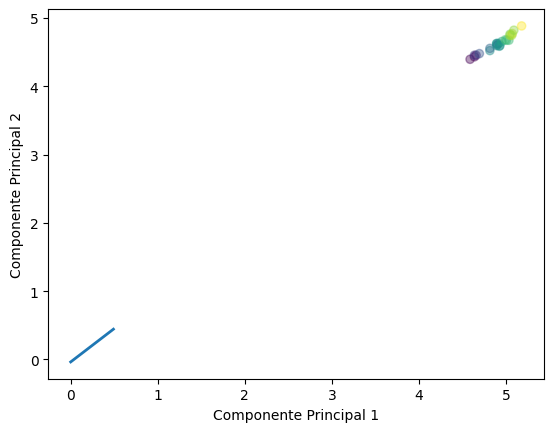

In [ ]:
def plot_FemaleTortoise(df_adjlogfem_tortoise,FemTortoise_red):
  plt.scatter(df_adjlogfem_tortoise['NatLog_length'],df_adjlogfem_tortoise['NatLog_width'],c=df_adjlogfem_tortoise['NatLog_height'], alpha=0.4)
  plt.plot(FemTortoise_red[0,:], FemTortoise_red[1,:], lw=2)
  plt.xlabel("Componente Principal 1")
  plt.ylabel("Componente Principal 2")
  plt.show()


plot_FemaleTortoise(df_adjlogfem_tortoise,FemTortoise_red)

#### **Principal Component Analysis (PCA) para el volumen del caparazón de las Tortugas Macho.**

Dado que se tiene un DataFrame correspondiente a las medidas ajustadas mediante la aplicación del logaritmo natural, se procederá mediante a realizar el PCA; se aplicará el proceso por pasos en primera instancia y posteriormente se verificarán los resultados mediante la biblioteca sci-kit.learn

**Análisis 'from' scratch**

In [ ]:
np.mean(df_adjlogmale_tortoise, axis = 0) # Calcula la media por cada una de las variables y posteriormente, realizar la impresión del resultado en la consola.

NatLog_length    4.725444
NatLog_width     4.477574
NatLog_height    3.703186
dtype: float64

In [ ]:
np.mean(df_adjlogmale_tortoise, axis = 1) # Calcula la media por cada uno de los renglones y posteriormente, realizar la impresión del resultado
# en la consola.

24    4.149194
25    4.151784
26    4.167241
27    4.236500
28    4.235070
29    4.213365
30    4.242264
31    4.248614
32    4.239045
33    4.298672
34    4.297868
35    4.293142
36    4.338200
37    4.325185
38    4.328869
39    4.341765
40    4.321669
41    4.368094
42    4.362446
43    4.389192
44    4.405066
45    4.404190
46    4.419239
47    4.472954
dtype: float64

In [ ]:
# Centramos a los datos
MaleTortoiseShells_mean = df_adjlogmale_tortoise - np.mean(df_adjlogmale_tortoise, axis = 0)
# Imprimir en consola los valores ajustados respecto a cada una de las variables respecto al primer momento centralizado.
MaleTortoiseShells_mean

,NatLog_length,NatLog_width,NatLog_height
24,-0.192844,-0.173509,-0.092268
25,-0.182149,-0.120865,-0.147838
26,-0.161095,-0.095547,-0.147838
27,-0.110323,-0.046757,-0.039624
28,-0.100471,-0.034923,-0.065600
29,-0.090715,-0.083125,-0.092268
30,-0.081053,-0.058733,-0.039624
31,-0.062005,-0.058733,-0.039624
32,-0.052615,-0.070855,-0.065600
33,-0.006945,0.011063,-0.014306


In [ ]:
# Matriz de Varianzas-Covarianzas
VarCov_MaleTortoise= np.cov(MaleTortoiseShells_mean, rowvar = False)

print(VarCov_MaleTortoise)

[[0.011072   0.00801914 0.00815965]
 [0.00801914 0.00641673 0.00600527]
 [0.00815965 0.00600527 0.00677276]]


In [ ]:
# Para demostrar que la matriz generada, se procederá a calcular eigenvalores y eigenvectores, para esto, se empleará la función 'eigh' de la sub-biblioteca
# 'linalgebra' para realizar el cálculo de ambos parámetros
eigen_val_MaleT, eigen_vec_MaleT = np.linalg.eigh(VarCov_MaleTortoise)
print('Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de los caparazones de las tortugas macho son:')
print(eigen_val_MaleT)
print('Los eigenvenctores asociados al Varianzas-Covarianzas de los caparazones de las tortugas macho son:')
print(eigen_vec_MaleT)

Los eigenvalores correspondientes a la matriz de Varianzas-Covarianzas de los caparazones de las tortugas macho son:
[0.00035984 0.0005983  0.02330335]
Los eigenvenctores asociados al Varianzas-Covarianzas de los caparazones de las tortugas macho son:
[[-0.71269743 -0.15947908 -0.68310233]
 [ 0.62195341 -0.59401177 -0.51021953]
 [ 0.32440148  0.78848997 -0.52253923]]


In [ ]:
# Reescribir los eigenvalores de manera decreciente y que satisfaga el Teorema, por lo que se reescribirán los valores de manera decreciente para que se
# encuentren dentro de la cámara de Weyl.
eigen_val_MaleT[::-1]

array([0.02330335, 0.0005983 , 0.00035984])

In [ ]:
eigen_vec_MaleT = eigen_vec_MaleT[:,np.argsort(eigen_val_MaleT)[::-1]]

print(eigen_vec_MaleT)

[[-0.68310233 -0.15947908 -0.71269743]
 [-0.51021953 -0.59401177  0.62195341]
 [-0.52253923  0.78848997  0.32440148]]


In [ ]:
n_componentsMT = 2
# Se elegirán ciertos elementos de las entradas pertenecientes a la matriz de eigenvectores generada previamente. Note que la matriz previa ya está ordenada de
# acuerdo con los eigenvectores ordenados de manera ascendente dentro de la cámara de Weyl.
eigenvectors_MaleT = eigen_vec_MaleT[:,0:n_componentsMT]
# Imprimir en consola la nueva matriz de eigenvectores correspondiente al PCA.
print(eigenvectors_MaleT)

[[-0.68310233 -0.15947908]
 [-0.51021953 -0.59401177]
 [-0.52253923  0.78848997]]


In [ ]:
#  Descomposición espectral
MaleTortoise_red = np.dot(eigenvectors_FemT.transpose(),FemTortoiseShells_mean.transpose()).transpose()

MaleTortoise_red

array([[ 4.91813978e-01,  1.75183340e-03],
       [ 4.43244627e-01, -3.60136778e-02],
       [ 3.70283584e-01,  3.30169796e-02],
       [ 3.88331940e-01, -1.41563933e-02],
       [ 2.95304326e-01,  3.43223674e-02],
       [ 1.19952122e-01,  6.15070423e-02],
       [ 1.55714836e-01, -1.74880519e-02],
       [ 2.36329677e-02,  1.10436646e-02],
       [ 9.18200222e-03, -1.36380361e-03],
       [ 9.18200222e-03, -1.36380361e-03],
       [ 5.14025281e-02, -4.42817057e-02],
       [ 1.99129098e-02, -4.30189934e-02],
       [ 1.01086282e-02,  1.77540156e-03],
       [ 6.68576586e-04, -5.75453061e-03],
       [-6.48611428e-02, -9.70881652e-03],
       [-1.49190309e-01,  1.69083801e-02],
       [-1.31122893e-01, -1.35026182e-02],
       [-1.58692533e-01, -1.13724444e-02],
       [-2.74136396e-01,  4.54963892e-02],
       [-2.52467313e-01, -8.92911766e-05],
       [-2.76221860e-01,  2.41712221e-02],
       [-3.02457169e-01,  2.31955988e-02],
       [-3.18250434e-01, -3.13298313e-02],
       [-4.

In [ ]:
FT_red = pd.DataFrame(FemTortoise_red , columns = ['PC1_FT','PC2_FT'])
print(FemTortoise_red)

[[ 4.91813978e-01  1.75183340e-03]
 [ 4.43244627e-01 -3.60136778e-02]
 [ 3.70283584e-01  3.30169796e-02]
 [ 3.88331940e-01 -1.41563933e-02]
 [ 2.95304326e-01  3.43223674e-02]
 [ 1.19952122e-01  6.15070423e-02]
 [ 1.55714836e-01 -1.74880519e-02]
 [ 2.36329677e-02  1.10436646e-02]
 [ 9.18200222e-03 -1.36380361e-03]
 [ 9.18200222e-03 -1.36380361e-03]
 [ 5.14025281e-02 -4.42817057e-02]
 [ 1.99129098e-02 -4.30189934e-02]
 [ 1.01086282e-02  1.77540156e-03]
 [ 6.68576586e-04 -5.75453061e-03]
 [-6.48611428e-02 -9.70881652e-03]
 [-1.49190309e-01  1.69083801e-02]
 [-1.31122893e-01 -1.35026182e-02]
 [-1.58692533e-01 -1.13724444e-02]
 [-2.74136396e-01  4.54963892e-02]
 [-2.52467313e-01 -8.92911766e-05]
 [-2.76221860e-01  2.41712221e-02]
 [-3.02457169e-01  2.31955988e-02]
 [-3.18250434e-01 -3.13298313e-02]
 [-4.61334979e-01 -2.37449177e-02]]


# **2-. LDA & CDA**